In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

np.random.seed(0)

In [2]:
data = pd.read_csv('Telco.csv')
data.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


In [3]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
# Handle missing values and change the data type for TotalCharges
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan).astype(float)

In [6]:
data['TotalCharges'].dtype

dtype('float64')

## Transform Continuous Variables

+ TotalCharges

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

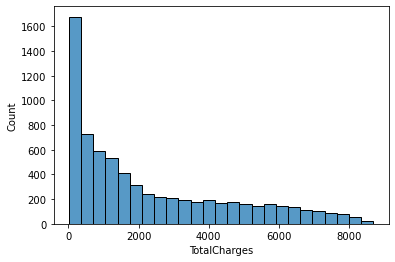

In [7]:
# Plot distribution
sns.histplot(data['TotalCharges'])

In [8]:
data['TotalCharges'] = np.log(data['TotalCharges'])
data['TotalCharges'].head(7)

0    3.396185
1    7.544068
2    4.683519
3    7.517928
4    5.021575
5    6.709914
6    7.575277
Name: TotalCharges, dtype: float64

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

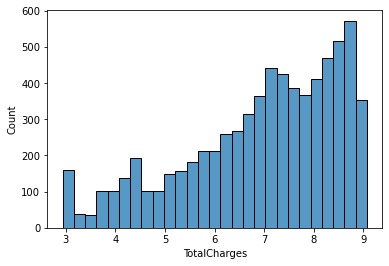

In [9]:
sns.histplot(data['TotalCharges'])

In [10]:
# Variance & Standard Deviation
data['TotalCharges']  = (data['TotalCharges'] - data['TotalCharges'].mean()) / data['TotalCharges'].std()

In [11]:
data['TotalCharges'].head(7)

0   -2.281382
1    0.389269
2   -1.452520
3    0.372439
4   -1.234860
5   -0.147808
6    0.409363
Name: TotalCharges, dtype: float64

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

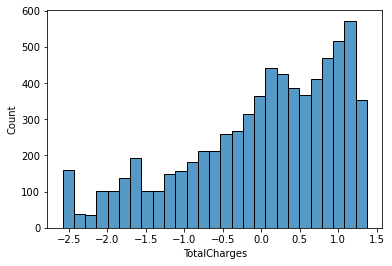

In [12]:
sns.histplot(data['TotalCharges'])

+ MonthlyCharges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

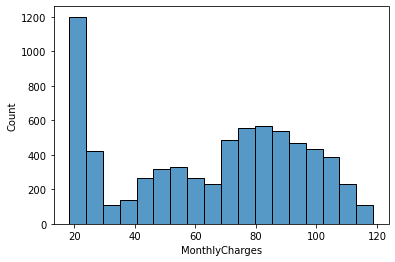

In [13]:
sns.histplot(data['MonthlyCharges'])

In [14]:
data['MonthlyCharges'] = np.log(data['MonthlyCharges'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

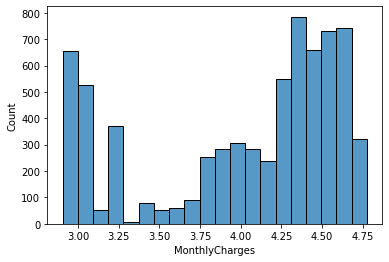

In [15]:
sns.histplot(data['MonthlyCharges'])

In [16]:
data['MonthlyCharges'] = (data['MonthlyCharges'] - data['MonthlyCharges'].mean()) / data['MonthlyCharges'].std()
data['MonthlyCharges'].head()

0   -1.052670
1    0.034077
2   -0.060083
3   -0.466216
4    0.397911
Name: MonthlyCharges, dtype: float64

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

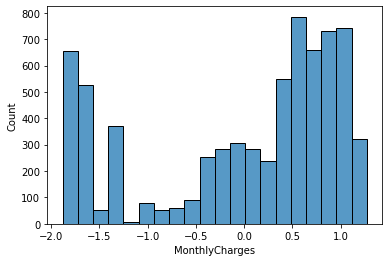

In [17]:
sns.histplot(data['MonthlyCharges'])

>> Tenure

In [18]:
data['tenure'].head()

0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64

<AxesSubplot:xlabel='tenure', ylabel='Count'>

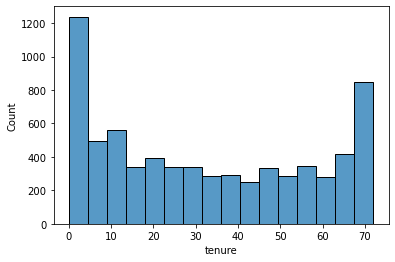

In [19]:
sns.histplot(data['tenure'])

In [20]:
data['tenure'] = (data['tenure'] - data['tenure'].mean()) / data['tenure'].std()

In [21]:
data['tenure'].head()

0   -1.277354
1    0.066323
2   -1.236636
3    0.514215
4   -1.236636
Name: tenure, dtype: float64

<AxesSubplot:xlabel='tenure', ylabel='Count'>

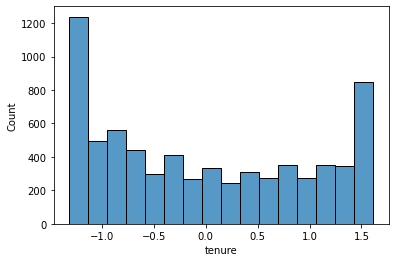

In [22]:
sns.histplot(data['tenure'])

In [26]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,-1.277354,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,-1.052670,-2.281382,No
1,5575-GNVDE,Male,0,No,No,0.066323,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,0.034077,0.389269,No
2,3668-QPYBK,Male,0,No,No,-1.236636,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,-0.060083,-1.452520,Yes
3,7795-CFOCW,Male,0,No,No,0.514215,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.466216,0.372439,No
4,9237-HQITU,Female,0,No,No,-1.236636,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.397911,-1.234860,Yes


In [27]:
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [28]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,-1.277354,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,-1.052670,-2.281382,0
1,5575-GNVDE,Male,0,No,No,0.066323,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,0.034077,0.389269,0
2,3668-QPYBK,Male,0,No,No,-1.236636,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,-0.060083,-1.452520,1
3,7795-CFOCW,Male,0,No,No,0.514215,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.466216,0.372439,0
4,9237-HQITU,Female,0,No,No,-1.236636,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.397911,-1.234860,1


In [39]:
num_data = data.select_dtypes(exclude='object')
num_data.head(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,-1.277354,-1.052670,-2.281382,0
1,0,0.066323,0.034077,0.389269,0
2,0,-1.236636,-0.060083,-1.452520,1
3,0,0.514215,-0.466216,0.372439,0
4,0,-1.236636,0.397911,-1.234860,1
5,0,-0.992332,0.975308,-0.147808,1
6,0,-0.422287,0.787050,0.409363,0
7,0,-0.910897,-1.058315,-0.791550,0
8,0,-0.177982,1.060078,0.696733,1
9,0,1.206412,0.010278,0.783956,0


In [33]:
data.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [40]:
cat_data = data.select_dtypes('object')
cat_data.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [43]:
cat_data.nunique()

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
dtype: int64

In [42]:
num_cols = num_data.columns.tolist()
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [46]:
for col in cat_data.columns:
    if cat_data[col].nunique() < 10:
        

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
